In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER,LATITUDE_FORMATTER
import os,errno
import sys
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
import pandas as pd
import datetime as dt
from scipy.ndimage.measurements import label
from math import sin, cos, sqrt, atan2, radians
import scipy.stats as st
import geopy.distance
%matplotlib inline

dir2='/thorncroftlab_rit/ahenny/rain/'
dir1='/thorncroftlab_rit/ahenny/rain/US/ghcnd_all/'
dir='/thorncroftlab_rit/ahenny/rain/DISSERTATION_SCRIPTS_RESULTS/'
#This script makes bar plots of EP day seasonal frequency and precipitation by weather type

In [ ]:
ds=xr.open_dataset(dir+'ls_extreme_rain_taiwan_99_80.nc')
p=ds['large_scale_extreme_rain_all']#total rainfall on ER days
threshold=ds['threshold_99']
dates=ds.time
print(dates)

mean_obs_day_list=p.mean(dim=('lat','lon'),skipna=True).values.tolist()
print(mean_obs_day_list)
dates_pd=pd.DatetimeIndex(dates.values)
years=[x.year for x in dates_pd]
print(years)
yrs_taiwan=np.arange(1979,2020,1)
yrs_neusa=yrs_taiwan

ds4=xr.open_dataset(dir+'taiwan_ep_days_stats_var95_newar.nc')
ar_yesno4=ds4['ar_yesno'].values.tolist()
ivt_yesno4=ds4['ivt_yesno'].values.tolist()
tc_yesno4=ds4['tc_yesno'].values.tolist()
other_yesno4=ds4['other_yesno'].values.tolist()
tc_linked_ar_yesno4=ds4['tc_linked_ar_yesno'].values.tolist()
tc_linked_ivt_yesno4=ds4['tc_linked_ivt_yesno'].values.tolist()
tc_remnant_linked_ivt_yesno4=ds4['ivt_tc_remnants_yesno'].values.tolist()
tc_remnant_ar_combo_yesno4=ds4['ar_tc_remnant_combo_yesno'].values.tolist()
tc_remnant_linked_ar_yesno4=ds4['tc_remnant_linked_ar_yesno'].values.tolist()
tc_remnants_yesno4=ds4['tc_remnants_yesno'].values.tolist()
tc_ar_combo_yesno4=ds4['tc_ar_combo_yesno'].values.tolist()

In [3]:
zipped_t1_years=list(zip(years,ar_yesno4,mean_obs_day_list))#ar-related = green
zipped_t2_years=list(zip(years,tc_linked_ar_yesno4,mean_obs_day_list))
zipped_t3_years=list(zip(years,tc_remnant_linked_ar_yesno4,mean_obs_day_list))
zipped_t4_years=list(zip(years,tc_yesno4,mean_obs_day_list))#tc-related = blue
zipped_t5_years=list(zip(years,tc_ar_combo_yesno4,mean_obs_day_list))
zipped_t6_years=list(zip(years,tc_remnant_ar_combo_yesno4,mean_obs_day_list))
zipped_t7_years=list(zip(years,tc_remnants_yesno4,mean_obs_day_list))
zipped_t8_years=list(zip(years,ivt_yesno4,mean_obs_day_list))#other IVT-related = grey
zipped_t9_years=list(zip(years,tc_linked_ivt_yesno4,mean_obs_day_list))
zipped_t10_years=list(zip(years,tc_remnant_linked_ivt_yesno4,mean_obs_day_list))
zipped_t11_years=list(zip(years,other_yesno4,mean_obs_day_list))#unspecified = brown

freq_t1_list=[]
freq_t2_list=[]
freq_t3_list=[]
freq_t4_list=[]
freq_t5_list=[]
freq_t6_list=[]
freq_t7_list=[]
freq_t8_list=[]
freq_t9_list=[]
freq_t10_list=[]
freq_t11_list=[]
precip_t1_list=[]
precip_t2_list=[]
precip_t3_list=[]
precip_t4_list=[]
precip_t5_list=[]
precip_t6_list=[]
precip_t7_list=[]
precip_t8_list=[]
precip_t9_list=[]
precip_t10_list=[]
precip_t11_list=[]
for i in range(len(yrs_taiwan)):
    year=1979+i
    select_t1=[x for x in zipped_t1_years if x[0]==year and x[1]==1]
    select_t2=[x for x in zipped_t2_years if x[0]==year and x[1]==1]
    select_t3=[x for x in zipped_t3_years if x[0]==year and x[1]==1]
    select_t4=[x for x in zipped_t4_years if x[0]==year and x[1]==1]
    select_t5=[x for x in zipped_t5_years if x[0]==year and x[1]==1]
    select_t6=[x for x in zipped_t6_years if x[0]==year and x[1]==1]
    select_t7=[x for x in zipped_t7_years if x[0]==year and x[1]==1]
    select_t8=[x for x in zipped_t8_years if x[0]==year and x[1]==1]
    select_t9=[x for x in zipped_t9_years if x[0]==year and x[1]==1]
    select_t10=[x for x in zipped_t10_years if x[0]==year and x[1]==1]
    select_t11=[x for x in zipped_t11_years if x[0]==year and x[1]==1]
    freq_t1=len(select_t1)
    freq_t2=len(select_t2)
    freq_t3=len(select_t3)
    freq_t4=len(select_t4)
    freq_t5=len(select_t5)
    freq_t6=len(select_t6)
    freq_t7=len(select_t7)
    freq_t8=len(select_t8)
    freq_t9=len(select_t9)
    freq_t10=len(select_t10)
    freq_t11=len(select_t11)
    freq_t1_list.append(freq_t1)
    freq_t2_list.append(freq_t2)
    freq_t3_list.append(freq_t3)
    freq_t4_list.append(freq_t4)
    freq_t5_list.append(freq_t5)
    freq_t6_list.append(freq_t6)
    freq_t7_list.append(freq_t7)
    freq_t8_list.append(freq_t8)
    freq_t9_list.append(freq_t9)
    freq_t10_list.append(freq_t10)
    freq_t11_list.append(freq_t11)
    
    precip_t1=[x[2] for x in select_t1]
    precip_t2=[x[2] for x in select_t2]
    precip_t3=[x[2] for x in select_t3]
    precip_t4=[x[2] for x in select_t4]
    precip_t5=[x[2] for x in select_t5]
    precip_t6=[x[2] for x in select_t6]
    precip_t7=[x[2] for x in select_t7]
    precip_t8=[x[2] for x in select_t8]
    precip_t9=[x[2] for x in select_t9]
    precip_t10=[x[2] for x in select_t10]
    precip_t11=[x[2] for x in select_t11]
    
    precip_sum_t1=sum(precip_t1)
    precip_sum_t2=sum(precip_t2)
    precip_sum_t3=sum(precip_t3)
    precip_sum_t4=sum(precip_t4)
    precip_sum_t5=sum(precip_t5)
    precip_sum_t6=sum(precip_t6)
    precip_sum_t7=sum(precip_t7)
    precip_sum_t8=sum(precip_t8)
    precip_sum_t9=sum(precip_t9)
    precip_sum_t10=sum(precip_t10)
    precip_sum_t11=sum(precip_t11)
    
    precip_t1_list.append(precip_sum_t1)
    precip_t2_list.append(precip_sum_t2)
    precip_t3_list.append(precip_sum_t3)
    precip_t4_list.append(precip_sum_t4)
    precip_t5_list.append(precip_sum_t5)
    precip_t6_list.append(precip_sum_t6)
    precip_t7_list.append(precip_sum_t7)
    precip_t8_list.append(precip_sum_t8)
    precip_t9_list.append(precip_sum_t9)
    precip_t10_list.append(precip_sum_t10)
    precip_t11_list.append(precip_sum_t11)

In [4]:
#@author: Michael Schramm on GitHub
#This function is derived from code originally posted by Sat Kumar Tomer
#(satkumartomer@gmail.com)
#See also: http://vsp.pnnl.gov/help/Vsample/Design_Trend_Mann_Kendall.htm
from scipy.stats import norm
import scipy.stats as st
def mk_test(x, alpha=0.05):
    n = len(x)

    # calculate S
    s = 0
    for k in range(n-1):
        for j in range(k+1, n):
            s += np.sign(x[j] - x[k])

    # calculate the unique data
    unique_x, tp = np.unique(x, return_counts=True)
    g = len(unique_x)

    # calculate the var(s)
    if n == g:  # there is no tie
        var_s = (n*(n-1)*(2*n+5))/18
    else:  # there are some ties in data
        var_s = (n*(n-1)*(2*n+5) - np.sum(tp*(tp-1)*(2*tp+5)))/18

    if s > 0:
        z = (s - 1)/np.sqrt(var_s)
    elif s < 0:
        z = (s + 1)/np.sqrt(var_s)
    else: # s == 0:
        z = 0

    # calculate the p_value
    p = 2*(1-norm.cdf(abs(z)))  # two tail test
    h = abs(z) > norm.ppf(1-alpha/2)

    if (z < 0) and h:
        trend = 'decreasing'
    elif (z > 0) and h:
        trend = 'increasing'
    else:
        trend = 'no trend'

    return trend, h, p, z

0
0


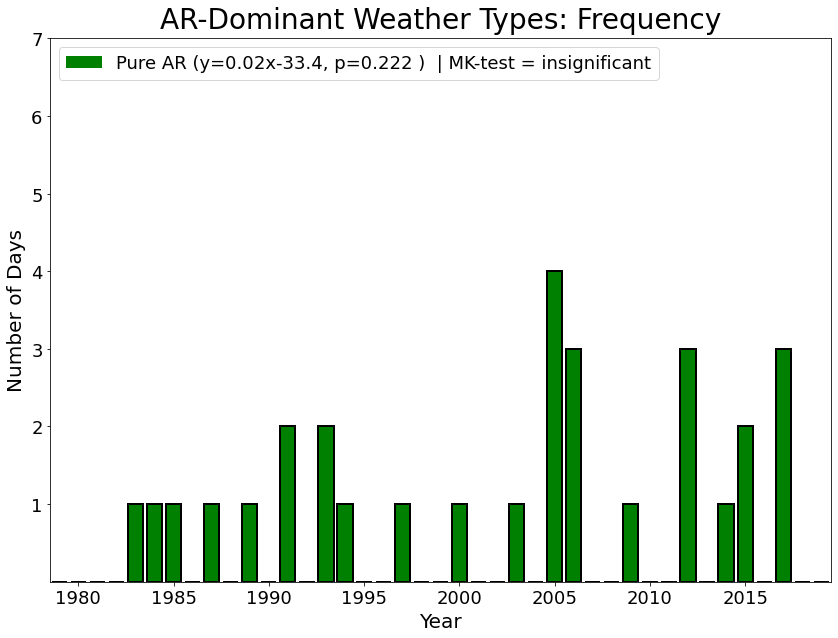

In [12]:
linreg=st.linregress(yrs_neusa,freq_t1_list)
slope1=linreg[0]
intercept1=linreg[1]
p_value1=linreg[3]
mk1=mk_test(freq_t1_list,alpha=0.05)
if mk1[0] in ['increasing','decreasing']:
    mk1_str='MK-test = significant'
else:
    mk1_str='MK-test = insignificant'
if intercept1<0:
    eq_str='y='+str(round(slope1,2))+'x-'+str(abs(round(intercept1,2)))+', p='+str(round(p_value1,4))+' ) '
else:
    eq_str='y='+str(round(slope1,2))+'x+'+str(abs(round(intercept1,2)))+', p='+str(round(p_value1,4))+' ) '

ar_total_list=[x+y+z for x,y,z in zip(freq_t1_list,freq_t2_list,freq_t3_list)]
linreg2=st.linregress(yrs_neusa,ar_total_list)
slope2=linreg2[0]
intercept2=linreg2[1]
p_value2=linreg2[3]
mk2=mk_test(ar_total_list,alpha=0.05)
if mk2[0] in ['increasing','decreasing']:
    mk2_str='MK-test = significant'
else:
    mk2_str='MK-test = insignificant'
if intercept2<0:
    eq_str2='y='+str(round(slope2,2))+'x-'+str(abs(round(intercept2,2)))+', p='+str(round(p_value2,4))+' ) '
else:
    eq_str2='y='+str(round(slope2,2))+'x+'+str(abs(round(intercept2,2)))+', p='+str(round(p_value2,4))+' ) '

print(sum(freq_t2_list))
print(sum(freq_t3_list))
fig=plt.figure(figsize=(14,10))
ax=plt.subplot(1,1,1)
ax.bar(yrs_neusa,ar_total_list,color='None',edgecolor='k',linewidth=2.0,zorder=10)
ax.bar(yrs_neusa,freq_t1_list,color='g',label='Pure AR ('+eq_str+' | '+mk1_str)
#ax.bar(yrs_neusa,freq_t2_list,color='limegreen',bottom=freq_t1_list,label='TC-linked AR')
#ax.bar(yrs_neusa,freq_t3_list,color='palegreen',bottom=[x+y for x,y in zip(freq_t1_list,freq_t2_list)],label='TC remnant-linked AR')
ax.set_title('AR-Dominant Weather Types: Frequency',fontsize=28,pad=10)
ax.tick_params(labelsize=18)
ax.set_xlabel('Year',fontsize=20,labelpad=5)
ax.set_ylabel('Number of Days',fontsize=20,labelpad=5)
ax.set_ylim(0,7)
ax.set_xlim(1978.5,2019.5)
plt.legend(loc='upper left',fontsize=18)
plt.yticks([1,2,3,4,5,6,7])

plt.show()

In [13]:
fig.savefig(dir+'taiwan_wtypes_bars1.png')

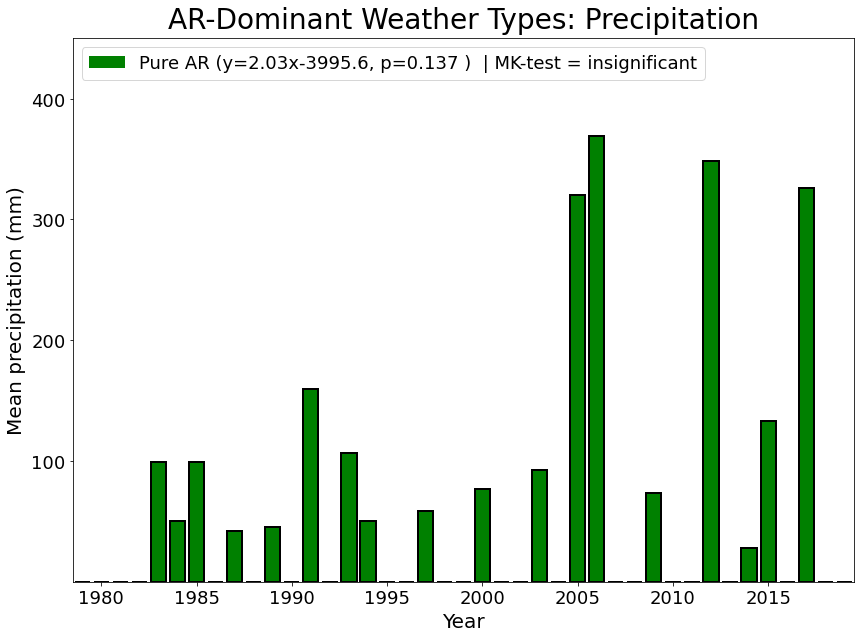

In [15]:
linreg=st.linregress(yrs_neusa,precip_t1_list)
slope1=linreg[0]
intercept1=linreg[1]
p_value1=linreg[3]
mk1=mk_test(precip_t1_list,alpha=0.05)
if mk1[0] in ['increasing','decreasing']:
    mk1_str='MK-test = significant'
else:
    mk1_str='MK-test = insignificant'
if intercept1<0:
    eq_str='y='+str(round(slope1,2))+'x-'+str(abs(round(intercept1,2)))+', p='+str(round(p_value1,4))+' ) '
else:
    eq_str='y='+str(round(slope1,2))+'x+'+str(abs(round(intercept1,2)))+', p='+str(round(p_value1,4))+' ) '

ar_total_list=[x+y+z for x,y,z in zip(precip_t1_list,precip_t2_list,precip_t3_list)]
linreg2=st.linregress(yrs_neusa,ar_total_list)
slope2=linreg2[0]
intercept2=linreg2[1]
p_value2=linreg2[3]
mk2=mk_test(ar_total_list,alpha=0.05)
if mk2[0] in ['increasing','decreasing']:
    mk2_str='MK-test = significant'
else:
    mk2_str='MK-test = insignificant'
if intercept2<0:
    eq_str2='y='+str(round(slope2,2))+'x-'+str(abs(round(intercept2,2)))+', p='+str(round(p_value2,4))+' ) '
else:
    eq_str2='y='+str(round(slope2,2))+'x+'+str(abs(round(intercept2,2)))+', p='+str(round(p_value2,4))+' ) '
    
fig=plt.figure(figsize=(14,10))
ax=plt.subplot(1,1,1)
ax.bar(yrs_neusa,ar_total_list,color='None',edgecolor='k',linewidth=2.0,zorder=10)
ax.bar(yrs_neusa,precip_t1_list,color='g',label='Pure AR ('+eq_str+' | '+mk1_str)
#ax.bar(yrs_neusa,precip_t2_list,color='limegreen',bottom=precip_t1_list,label='TC-linked AR')
#ax.bar(yrs_neusa,precip_t3_list,color='palegreen',bottom=[x+y for x,y in zip(precip_t1_list,precip_t2_list)],label='TC remnant-linked AR')
ax.set_title('AR-Dominant Weather Types: Precipitation',fontsize=28,pad=10)
ax.tick_params(labelsize=18)
ax.set_xlabel('Year',fontsize=20,labelpad=5)
ax.set_ylabel('Mean precipitation (mm)',fontsize=20,labelpad=5)
ax.set_ylim(0,450)
ax.set_xlim(1978.5,2019.5)
plt.legend(loc='upper left',fontsize=18)
plt.yticks([100,200,300,400])

plt.show()

In [16]:
fig.savefig(dir+'taiwan_wtypes_bars2.png')

0


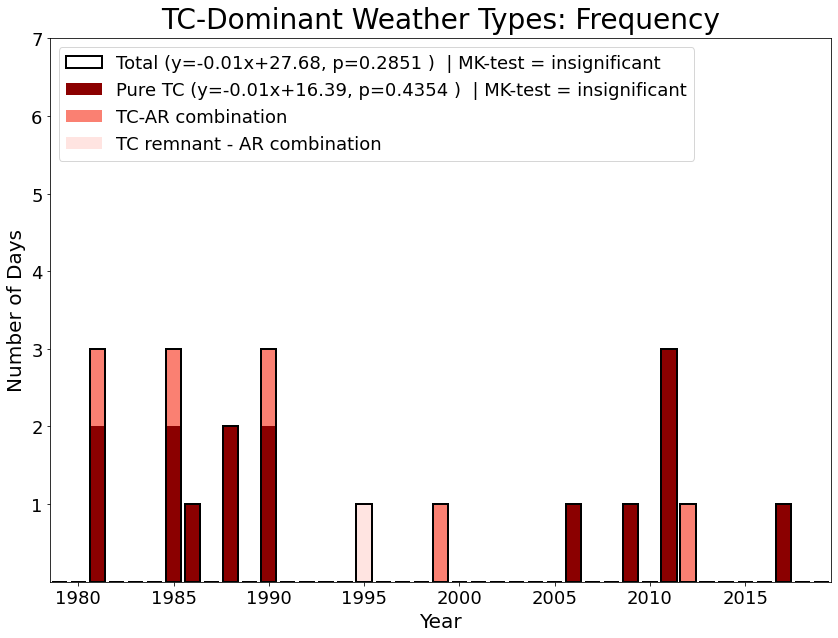

In [18]:
linreg1=st.linregress(yrs_neusa,freq_t4_list)
slope1=linreg1[0]
intercept1=linreg1[1]
p_value1=linreg1[3]
mk1=mk_test(freq_t4_list,alpha=0.05)
if mk1[0] in ['increasing','decreasing']:
    mk1_str='MK-test = significant'
else:
    mk1_str='MK-test = insignificant'
if intercept1<0:
    eq_str1='y='+str(round(slope1,2))+'x-'+str(abs(round(intercept1,2)))+', p='+str(round(p_value1,4))+' ) '
else:
    eq_str1='y='+str(round(slope1,2))+'x+'+str(abs(round(intercept1,2)))+', p='+str(round(p_value1,4))+' ) '

tc_total_list=[x+y+z+w for x,y,z,w in zip(freq_t4_list,freq_t5_list,freq_t6_list,freq_t7_list)]
linreg2=st.linregress(yrs_neusa,tc_total_list)
slope2=linreg2[0]
intercept2=linreg2[1]
p_value2=linreg2[3]
mk2=mk_test(tc_total_list,alpha=0.05)
if mk2[0] in ['increasing','decreasing']:
    mk2_str='MK-test = significant'
else:
    mk2_str='MK-test = insignificant'
if intercept2<0:
    eq_str2='y='+str(round(slope2,2))+'x-'+str(abs(round(intercept2,2)))+', p='+str(round(p_value2,4))+' ) '
else:
    eq_str2='y='+str(round(slope2,2))+'x+'+str(abs(round(intercept2,2)))+', p='+str(round(p_value2,4))+' ) '

    
linreg3=st.linregress(yrs_neusa,freq_t7_list)
slope3=linreg3[0]
intercept3=linreg3[1]
p_value3=linreg3[3]
mk3=mk_test(freq_t7_list,alpha=0.05)
if mk3[0] in ['increasing','decreasing']:
    mk3_str='MK-test = significant'
else:
    mk3_str='MK-test = insignificant'
if intercept1<0:
    eq_str3='y='+str(round(slope3,2))+'x-'+str(abs(round(intercept3,2)))+', p='+str(round(p_value3,4))+' ) '
else:
    eq_str3='y='+str(round(slope3,2))+'x+'+str(abs(round(intercept3,2)))+', p='+str(round(p_value3,4))+' ) '
    
linreg4=st.linregress(yrs_neusa,freq_t6_list)
slope4=linreg4[0]
intercept4=linreg4[1]
p_value4=linreg4[3]
mk4=mk_test(freq_t6_list,alpha=0.05)
if mk4[0] in ['increasing','decreasing']:
    mk4_str='MK-test = significant'
else:
    mk4_str='MK-test = insignificant'
if intercept1<0:
    eq_str4='y='+str(round(slope4,2))+'x-'+str(abs(round(intercept4,2)))+', p='+str(round(p_value4,4))+' ) '
else:
    eq_str4='y='+str(round(slope4,2))+'x+'+str(abs(round(intercept4,2)))+', p='+str(round(p_value4,4))+' ) '

print(sum(freq_t7_list))
fig=plt.figure(figsize=(14,10))
ax=plt.subplot(1,1,1)
ax.bar(yrs_neusa,tc_total_list,color='None',edgecolor='k',linewidth=2.0,label='Total ('+eq_str2+' | '+mk2_str,zorder=10)
ax.bar(yrs_neusa,freq_t4_list,color='darkred',label='Pure TC ('+eq_str1+' | '+mk1_str)
#ax.bar(yrs_neusa,freq_t7_list,color='r',bottom=freq_t4_list,label='TC remnants ('+eq_str3+' | '+mk3_str)
ax.bar(yrs_neusa,freq_t5_list,color='salmon',bottom=[x+y+z for x,y,z in zip(freq_t4_list,freq_t7_list,freq_t6_list)],label='TC-AR combination')
ax.bar(yrs_neusa,freq_t6_list,color='mistyrose',bottom=[x+y for x,y in zip(freq_t4_list,freq_t7_list)],label='TC remnant - AR combination')


ax.set_title('TC-Dominant Weather Types: Frequency',fontsize=28,pad=10)
ax.tick_params(labelsize=18)
ax.set_xlabel('Year',fontsize=20,labelpad=5)
ax.set_ylabel('Number of Days',fontsize=20,labelpad=5)
ax.set_ylim(0,7)
ax.set_xlim(1978.5,2019.5)
plt.legend(loc='upper left',fontsize=18)
plt.yticks([1,2,3,4,5,6,7])

plt.show()

In [19]:
fig.savefig(dir+'taiwan_wtypes_bars3.png')

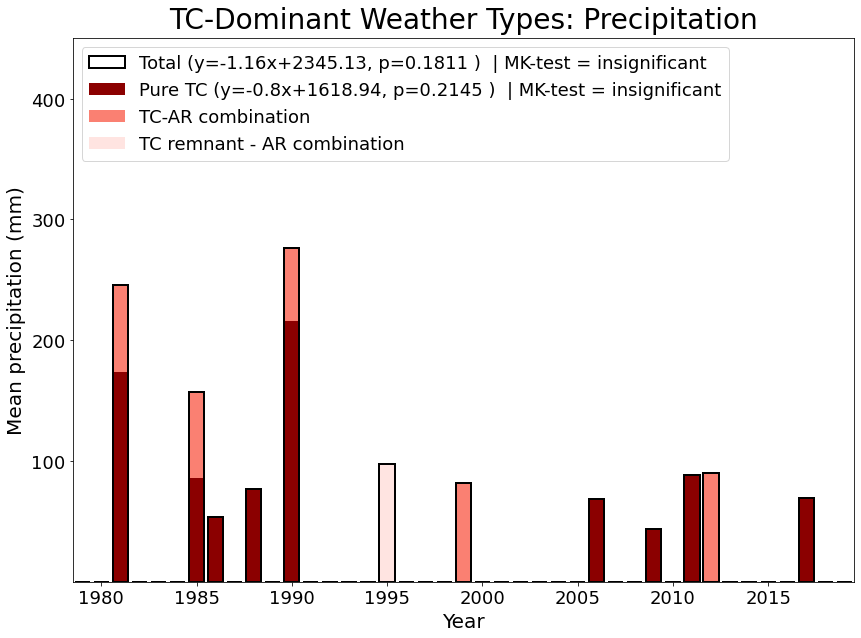

In [20]:
linreg1=st.linregress(yrs_neusa,precip_t4_list)
slope1=linreg1[0]
intercept1=linreg1[1]
p_value1=linreg1[3]
mk1=mk_test(precip_t4_list,alpha=0.05)
if mk1[0] in ['increasing','decreasing']:
    mk1_str='MK-test = significant'
else:
    mk1_str='MK-test = insignificant'
if intercept1<0:
    eq_str1='y='+str(round(slope1,2))+'x-'+str(abs(round(intercept1,2)))+', p='+str(round(p_value1,4))+' ) '
else:
    eq_str1='y='+str(round(slope1,2))+'x+'+str(abs(round(intercept1,2)))+', p='+str(round(p_value1,4))+' ) '

tc_total_list=[x+y+z+w for x,y,z,w in zip(precip_t4_list,precip_t5_list,precip_t6_list,precip_t7_list)]
linreg2=st.linregress(yrs_neusa,tc_total_list)
slope2=linreg2[0]
intercept2=linreg2[1]
p_value2=linreg2[3]
mk2=mk_test(tc_total_list,alpha=0.05)
if mk2[0] in ['increasing','decreasing']:
    mk2_str='MK-test = significant'
else:
    mk2_str='MK-test = insignificant'
if intercept2<0:
    eq_str2='y='+str(round(slope2,2))+'x-'+str(abs(round(intercept2,2)))+', p='+str(round(p_value2,4))+' ) '
else:
    eq_str2='y='+str(round(slope2,2))+'x+'+str(abs(round(intercept2,2)))+', p='+str(round(p_value2,4))+' ) '

linreg3=st.linregress(yrs_neusa,precip_t7_list)
slope3=linreg3[0]
intercept3=linreg3[1]
p_value3=linreg3[3]
mk3=mk_test(precip_t7_list,alpha=0.05)
if mk3[0] in ['increasing','decreasing']:
    mk3_str='MK-test = significant'
else:
    mk3_str='MK-test = insignificant'
if intercept1<0:
    eq_str3='y='+str(round(slope3,2))+'x-'+str(abs(round(intercept3,2)))+', p='+str(round(p_value3,4))+' ) '
else:
    eq_str3='y='+str(round(slope3,2))+'x+'+str(abs(round(intercept3,2)))+', p='+str(round(p_value3,4))+' ) '

linreg4=st.linregress(yrs_neusa,precip_t6_list)
slope4=linreg4[0]
intercept4=linreg4[1]
p_value4=linreg4[3]
mk4=mk_test(precip_t6_list,alpha=0.05)
if mk4[0] in ['increasing','decreasing']:
    mk4_str='MK-test = significant'
else:
    mk4_str='MK-test = insignificant'
if intercept1<0:
    eq_str4='y='+str(round(slope4,2))+'x-'+str(abs(round(intercept4,2)))+', p='+str(round(p_value4,4))+' ) '
else:
    eq_str4='y='+str(round(slope4,2))+'x+'+str(abs(round(intercept4,2)))+', p='+str(round(p_value4,4))+' ) '
    
fig=plt.figure(figsize=(14,10))
ax=plt.subplot(1,1,1)
ax.bar(yrs_neusa,tc_total_list,color='None',edgecolor='k',linewidth=2.0,label='Total ('+eq_str2+' | '+mk2_str,zorder=10)
ax.bar(yrs_neusa,precip_t4_list,color='darkred',label='Pure TC ('+eq_str1+' | '+mk1_str)
#ax.bar(yrs_neusa,precip_t7_list,color='r',bottom=precip_t4_list,label='TC remnants ('+eq_str3+' | '+mk3_str)
ax.bar(yrs_neusa,precip_t5_list,color='salmon',bottom=[x+y+z for x,y,z in zip(precip_t4_list,precip_t7_list,precip_t6_list)],label='TC-AR combination')
ax.bar(yrs_neusa,precip_t6_list,color='mistyrose',bottom=[x+y for x,y in zip(precip_t4_list,precip_t7_list)],label='TC remnant - AR combination')

ax.set_title('TC-Dominant Weather Types: Precipitation',fontsize=28,pad=10)
ax.tick_params(labelsize=18)
ax.set_xlabel('Year',fontsize=20,labelpad=5)
ax.set_ylabel('Mean precipitation (mm)',fontsize=20,labelpad=5)
ax.set_ylim(0,450)
ax.set_xlim(1978.5,2019.5)
plt.legend(loc='upper left',fontsize=18)
plt.yticks([100,200,300,400])

plt.show()

In [21]:
fig.savefig(dir+'taiwan_wtypes_bars4.png')

[1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 5, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


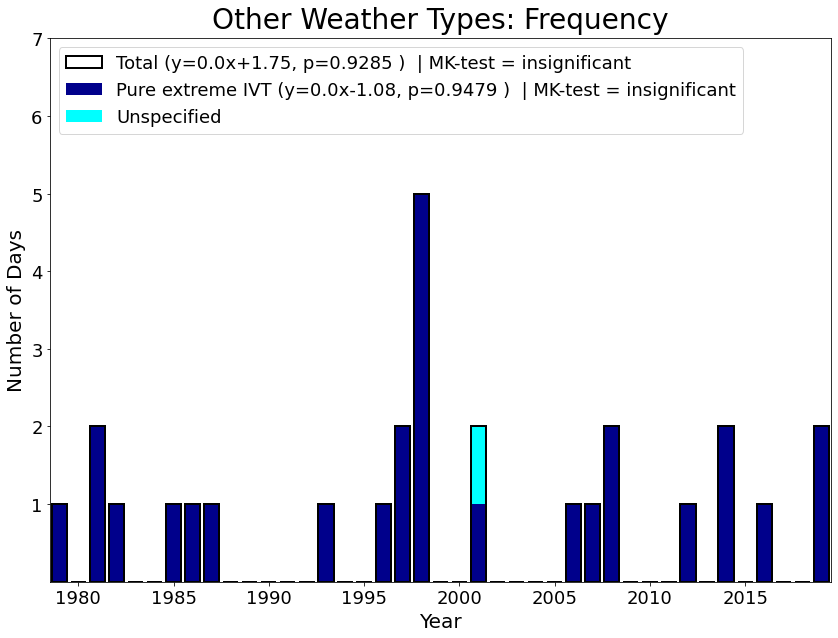

In [22]:
linreg1=st.linregress(yrs_neusa,freq_t8_list)
slope1=linreg1[0]
intercept1=linreg1[1]
p_value1=linreg1[3]
mk1=mk_test(freq_t8_list,alpha=0.05)
if mk1[0] in ['increasing','decreasing']:
    mk1_str='MK-test = significant'
else:
    mk1_str='MK-test = insignificant'
if intercept1<0:
    eq_str1='y='+str(round(slope1,2))+'x-'+str(abs(round(intercept1,2)))+', p='+str(round(p_value1,4))+' ) '
else:
    eq_str1='y='+str(round(slope1,2))+'x+'+str(abs(round(intercept1,2)))+', p='+str(round(p_value1,4))+' ) '
    
linreg2=st.linregress(yrs_neusa,freq_t9_list)
slope2=linreg2[0]
intercept2=linreg2[1]
p_value2=linreg2[3]
mk2=mk_test(freq_t9_list,alpha=0.05)
if mk2[0] in ['increasing','decreasing']:
    mk2_str='MK-test = significant'
else:
    mk2_str='MK-test = insignificant'
if intercept1<0:
    eq_str2='y='+str(round(slope2,2))+'x-'+str(abs(round(intercept2,2)))+', p='+str(round(p_value2,4))+' ) '
else:
    eq_str2='y='+str(round(slope2,2))+'x+'+str(abs(round(intercept2,2)))+', p='+str(round(p_value2,4))+' ) '
    
linreg3=st.linregress(yrs_neusa,freq_t11_list)
slope3=linreg3[0]
intercept3=linreg3[1]
p_value3=linreg3[3]
mk3=mk_test(freq_t11_list,alpha=0.05)
if mk3[0] in ['increasing','decreasing']:
    mk3_str='MK-test = significant'
else:
    mk3_str='MK-test = insignificant'
if intercept1<0:
    eq_str3='y='+str(round(slope3,2))+'x-'+str(abs(round(intercept3,2)))+', p='+str(round(p_value3,4))+' ) '
else:
    eq_str3='y='+str(round(slope3,2))+'x+'+str(abs(round(intercept3,2)))+', p='+str(round(p_value3,4))+' ) '

other_total_list=[x+y+z+w for x,y,z,w in zip(freq_t8_list,freq_t9_list,freq_t10_list,freq_t11_list)]
linreg4=st.linregress(yrs_neusa,other_total_list)
slope4=linreg4[0]
intercept4=linreg4[1]
p_value4=linreg4[3]
mk4=mk_test(other_total_list,alpha=0.05)
if mk4[0] in ['increasing','decreasing']:
    mk4_str='MK-test = significant'
else:
    mk4_str='MK-test = insignificant'
if intercept2<0:
    eq_str4='y='+str(round(slope4,2))+'x-'+str(abs(round(intercept4,2)))+', p='+str(round(p_value4,4))+' ) '
else:
    eq_str4='y='+str(round(slope4,2))+'x+'+str(abs(round(intercept4,2)))+', p='+str(round(p_value4,4))+' ) '

    
linreg5=st.linregress(yrs_neusa,freq_t10_list)
slope5=linreg5[0]
intercept5=linreg5[1]
p_value5=linreg5[3]
mk5=mk_test(freq_t10_list,alpha=0.05)
if mk5[0] in ['increasing','decreasing']:
    mk5_str='MK-test = significant'
else:
    mk5_str='MK-test = insignificant'
if intercept1<0:
    eq_str5='y='+str(round(slope5,2))+'x-'+str(abs(round(intercept5,2)))+', p='+str(round(p_value5,4))+' ) '
else:
    eq_str5='y='+str(round(slope5,2))+'x+'+str(abs(round(intercept5,2)))+', p='+str(round(p_value5,4))+' ) '


fig=plt.figure(figsize=(14,10))
ax=plt.subplot(1,1,1)
print(freq_t8_list)
print(freq_t9_list)
print(freq_t10_list)
print(freq_t11_list)
ax.bar(yrs_neusa,other_total_list,color='None',edgecolor='k',linewidth=2.0,label='Total ('+eq_str4+' | '+mk4_str,zorder=10)
ax.bar(yrs_neusa,freq_t8_list,color='darkblue',label='Pure extreme IVT ('+eq_str1+' | '+mk1_str)
#ax.bar(yrs_neusa,freq_t9_list,color='b',bottom=freq_t8_list,label='TC-linked extreme IVT ('+eq_str2+' | '+mk2_str)
#ax.bar(yrs_neusa,freq_t10_list,color='dodgerblue',bottom=[x+y for x,y in zip(freq_t8_list,freq_t9_list)],label='TC remnant-linked extreme IVT ('+eq_str5+' | '+mk5_str)
ax.bar(yrs_neusa,freq_t11_list,color='cyan',bottom=[x+y+z for x,y,z in zip(freq_t8_list,freq_t9_list,freq_t10_list)],label='Unspecified')# ('+eq_str3+' | '+mk3_str)




ax.set_title('Other Weather Types: Frequency',fontsize=28,pad=10)
ax.tick_params(labelsize=18)
ax.set_xlabel('Year',fontsize=20,labelpad=5)
ax.set_ylabel('Number of Days',fontsize=20,labelpad=5)
ax.set_ylim(0,7)
ax.set_xlim(1978.5,2019.5)
plt.legend(loc='upper left',fontsize=18)
plt.yticks([1,2,3,4,5,6,7])

plt.show()

In [23]:
fig.savefig(dir+'taiwan_wtypes_bars5.png')

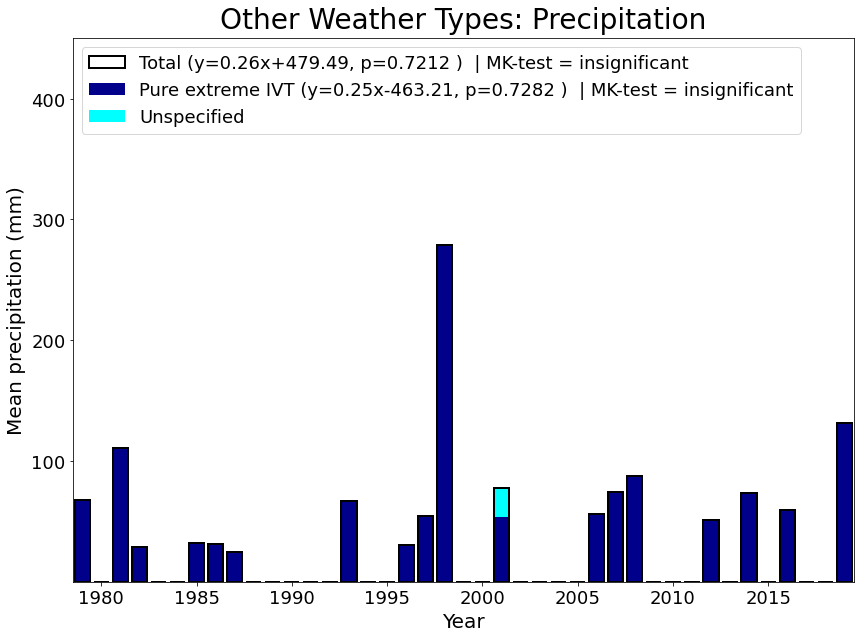

In [24]:
linreg1=st.linregress(yrs_neusa,precip_t8_list)
slope1=linreg1[0]
intercept1=linreg1[1]
p_value1=linreg1[3]
mk1=mk_test(precip_t8_list,alpha=0.05)
if mk1[0] in ['increasing','decreasing']:
    mk1_str='MK-test = significant'
else:
    mk1_str='MK-test = insignificant'
if intercept1<0:
    eq_str1='y='+str(round(slope1,2))+'x-'+str(abs(round(intercept1,2)))+', p='+str(round(p_value1,4))+' ) '
else:
    eq_str1='y='+str(round(slope1,2))+'x+'+str(abs(round(intercept1,2)))+', p='+str(round(p_value1,4))+' ) '
    
linreg2=st.linregress(yrs_neusa,precip_t9_list)
slope2=linreg2[0]
intercept2=linreg2[1]
p_value2=linreg2[3]
mk2=mk_test(precip_t9_list,alpha=0.05)
if mk2[0] in ['increasing','decreasing']:
    mk2_str='MK-test = significant'
else:
    mk2_str='MK-test = insignificant'
if intercept1<0:
    eq_str2='y='+str(round(slope2,2))+'x-'+str(abs(round(intercept2,2)))+', p='+str(round(p_value2,4))+' ) '
else:
    eq_str2='y='+str(round(slope2,2))+'x+'+str(abs(round(intercept2,2)))+', p='+str(round(p_value2,4))+' ) '
    
linreg3=st.linregress(yrs_neusa,precip_t11_list)
slope3=linreg3[0]
intercept3=linreg3[1]
p_value3=linreg3[3]
mk3=mk_test(precip_t11_list,alpha=0.05)
if mk3[0] in ['increasing','decreasing']:
    mk3_str='MK-test = significant'
else:
    mk3_str='MK-test = insignificant'
if intercept1<0:
    eq_str3='y='+str(round(slope3,2))+'x-'+str(abs(round(intercept3,2)))+', p='+str(round(p_value3,4))+' ) '
else:
    eq_str3='y='+str(round(slope3,2))+'x+'+str(abs(round(intercept3,2)))+', p='+str(round(p_value3,4))+' ) '

other_total_list=[x+y+z+w for x,y,z,w in zip(precip_t8_list,precip_t9_list,precip_t10_list,precip_t11_list)]
linreg4=st.linregress(yrs_neusa,other_total_list)
slope4=linreg4[0]
intercept4=linreg4[1]
p_value4=linreg4[3]
mk4=mk_test(other_total_list,alpha=0.05)
if mk4[0] in ['increasing','decreasing']:
    mk4_str='MK-test = significant'
else:
    mk4_str='MK-test = insignificant'
if intercept2<0:
    eq_str4='y='+str(round(slope4,2))+'x-'+str(abs(round(intercept4,2)))+', p='+str(round(p_value4,4))+' ) '
else:
    eq_str4='y='+str(round(slope4,2))+'x+'+str(abs(round(intercept4,2)))+', p='+str(round(p_value4,4))+' ) '

linreg5=st.linregress(yrs_neusa,precip_t10_list)
slope5=linreg5[0]
intercept5=linreg5[1]
p_value5=linreg5[3]
mk5=mk_test(precip_t10_list,alpha=0.05)
if mk5[0] in ['increasing','decreasing']:
    mk5_str='MK-test = significant'
else:
    mk5_str='MK-test = insignificant'
if intercept1<0:
    eq_str5='y='+str(round(slope5,2))+'x-'+str(abs(round(intercept5,2)))+', p='+str(round(p_value5,4))+' ) '
else:
    eq_str5='y='+str(round(slope5,2))+'x+'+str(abs(round(intercept5,2)))+', p='+str(round(p_value5,4))+' ) '


    
fig=plt.figure(figsize=(14,10))
ax=plt.subplot(1,1,1)

ax.bar(yrs_neusa,other_total_list,color='None',edgecolor='k',linewidth=2.0,label='Total ('+eq_str4+' | '+mk4_str,zorder=10)
ax.bar(yrs_neusa,precip_t8_list,color='darkblue',label='Pure extreme IVT ('+eq_str1+' | '+mk1_str)
#ax.bar(yrs_neusa,precip_t9_list,color='b',bottom=precip_t8_list,label='TC-linked extreme IVT ('+eq_str2+' | '+mk2_str)
#ax.bar(yrs_neusa,precip_t10_list,color='dodgerblue',bottom=[x+y for x,y in zip(freq_t8_list,freq_t9_list)],label='TC remnant-linked extreme IVT ('+eq_str5+' | '+mk5_str)
ax.bar(yrs_neusa,precip_t11_list,color='cyan',bottom=[x+y+z for x,y,z in zip(precip_t8_list,precip_t9_list,precip_t10_list)],label='Unspecified')# ('+eq_str3+' | '+mk3_str)

ax.set_title('Other Weather Types: Precipitation',fontsize=28,pad=10)
ax.tick_params(labelsize=18)
ax.set_xlabel('Year',fontsize=20,labelpad=5)
ax.set_ylabel('Mean precipitation (mm)',fontsize=20,labelpad=5)
ax.set_ylim(0,450)
ax.set_xlim(1978.5,2019.5)
plt.legend(loc='upper left',fontsize=18)
plt.yticks([100,200,300,400])

plt.show()

In [25]:
fig.savefig(dir+'taiwan_wtypes_bars6.png')